# Data Analysis of NCOV-19 Cases in Indonesia

This is my own personal analysis of NCOV-19 day-to-day cases, licensed in MIT License, so feel free to use.

Worldwide COVID-19 dataset is taken from [datahub.io](https://datahub.io/core/covid-19). Here are samples of it:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set_style("whitegrid")

dataset = pd.read_csv(
    "https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv",
)
dataset

,Date,Country,Confirmed,Deaths
0,2020-01-22,Afghanistan,0,0
1,2020-01-22,Albania,0,0
2,2020-01-22,Algeria,0,0
3,2020-01-22,Andorra,0,0
4,2020-01-22,Angola,0,0
...,...,...,...,...
11131,2020-03-25,Venezuela,91,0
11132,2020-03-25,Vietnam,141,0
11133,2020-03-25,West Bank and Gaza,-1,-1
11134,2020-03-25,Zambia,12,0


## Indonesia

Indonesia COVID-19 dataset is derived from the worldwide one.
Data before 2020-03-01 is truncated because there's no cases before that date.

In [2]:
dataset_id = dataset[(dataset["Country"] == "Indonesia") & (dataset["Date"] >= "2020-03-01")]
dataset_id = dataset_id.drop(columns=["Country"])
dataset_id.tail()

,Date,Confirmed,Deaths
10342,2020-03-21,450,38
10516,2020-03-22,514,48
10690,2020-03-23,579,49
10864,2020-03-24,686,55
11038,2020-03-25,790,58


Difference of each days can be seen in this table:

In [3]:
diff_columns = dataset_id.columns.difference(['Date'])
dataset_id_diff = dataset_id.copy()
dataset_id_diff[diff_columns] = dataset_id_diff[diff_columns].diff()
dataset_id_diff.tail()

,Date,Confirmed,Deaths
10342,2020-03-21,81.0,6.0
10516,2020-03-22,64.0,10.0
10690,2020-03-23,65.0,1.0
10864,2020-03-24,107.0,6.0
11038,2020-03-25,104.0,3.0


### Confirmed Cases

#### Actual

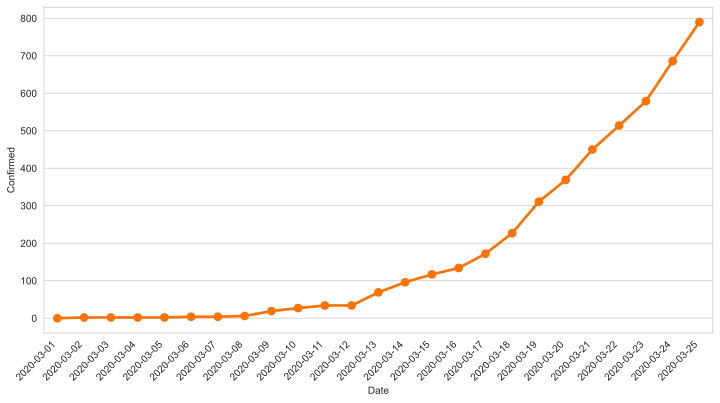

In [4]:
plt.figure(figsize=(12, 6))
sns.pointplot(
    x="Date",
    y="Confirmed",
    data=dataset_id,
    color=sns.xkcd_rgb["orange"]
)
_ = plt.xticks(rotation=45, horizontalalignment="right")

#### Rise

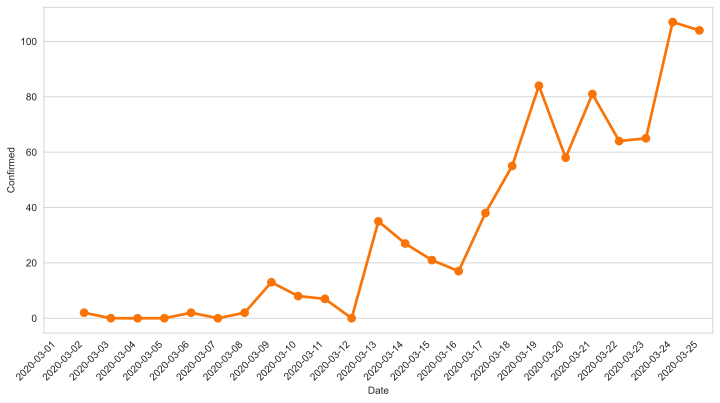

In [5]:
plt.figure(figsize=(12, 6))
sns.pointplot(
    x="Date",
    y="Confirmed",
    data=dataset_id_diff,
    color=sns.xkcd_rgb["orange"]
)
_ = plt.xticks(rotation=45, horizontalalignment="right")

### Recovered

#### Actual

In [6]:
plt.figure(figsize=(12, 6))
sns.pointplot(
    x="Date",
    y="Recovered",
    data=dataset_id,
    color=sns.xkcd_rgb["green"]
)
_ = plt.xticks(rotation=45, horizontalalignment="right")

ValueError: Could not interpret input 'Recovered'

<Figure size 864x432 with 0 Axes>

#### Rise

In [ ]:
plt.figure(figsize=(12, 6))
sns.pointplot(
    x="Date",
    y="Recovered",
    data=dataset_id_diff,
    color=sns.xkcd_rgb["green"]
)
_ = plt.xticks(rotation=45, horizontalalignment="right")

### Deaths

#### Actual

In [ ]:
plt.figure(figsize=(12, 6))
sns.pointplot(
    x="Date",
    y="Deaths",
    data=dataset_id,
    color=sns.xkcd_rgb["red"]
)
_ = plt.xticks(rotation=45, horizontalalignment="right")

#### Rise

In [ ]:
plt.figure(figsize=(12, 6))
sns.pointplot(
    x="Date",
    y="Deaths",
    data=dataset_id_diff,
    color=sns.xkcd_rgb["red"]
)
_ = plt.xticks(rotation=45, horizontalalignment="right")